In [9]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as pl
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
# For reading stock data from yahoo
from __future__ import division
from pandas_datareader import DataReader
#import fix_yahoo_finance as yf

# For time stamps
from datetime import datetime

In [3]:
# List of Tech_stocks for analytics
tech_list = ['AAPL','AMZN','FB','GOOG','NFLX','TSLA']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for grabing Yahoo finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [12]:
df=AAPL
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-11,79.262497,76.809998,77.025002,78.752502,145946400.0,78.225410
2020-05-12,79.922501,77.727501,79.457497,77.852501,162301200.0,77.331436
2020-05-13,78.987503,75.802498,78.037498,76.912498,200622400.0,76.397720
2020-05-14,77.447502,75.382500,76.127502,77.385002,158929200.0,76.867065
2020-05-15,76.974998,75.052498,75.087502,76.927498,166348400.0,76.412621


In [13]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2021-05-03,132.315247,75135100.0,1.690060,0.378673
2021-05-04,127.633202,137564700.0,3.746585,-2.545929
2021-05-05,127.882790,84000900.0,1.935984,-0.851386
2021-05-06,129.520004,78128300.0,2.019425,1.446560
2021-05-07,130.210007,78892700.0,1.367021,-0.489109


In [14]:
import math
from sklearn import preprocessing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]
y_lately = y[-forecast_out:]

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [22]:
X_train = X
y_train = y

# 1. Linear regression 
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)



LinearRegression(n_jobs=-1)

In [23]:
X_test = X_lately
y_test = y_lately

confidence_reg = clfreg.score(X_test, y_test)

print("confidencereg : ",confidence_reg)


confidencereg :  0.8342855302834771


In [24]:
dfreg_lr = dfreg.copy()
dfreg_lasso = dfreg.copy()
dfreg_ridge = dfreg.copy()
dfreg_br = dfreg.copy()

noOfDaysData = 100

# Prediction using Linear Regression

In [25]:
forecast_set_linear_regression = clfreg.predict(X_lately)
dfreg_lr['Forecast_linear_regression'] =  np.nan
print(forecast_set_linear_regression)

[128.17952615 129.43503683 130.82503343]


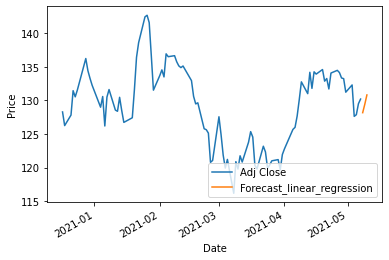

In [26]:
last_date = dfreg_lr.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set_linear_regression:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg_lr.loc[next_date] = [np.nan for _ in range(len(dfreg_lr.columns)-1)]+[i]
dfreg_lr['Adj Close'].tail(noOfDaysData).plot()
dfreg_lr['Forecast_linear_regression'].tail(noOfDaysData).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [27]:
df=AMZN
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-11,2419.669922,2372.110107,2374.699951,2409.000000,3259200,2409.000000
2020-05-12,2419.000000,2355.000000,2411.850098,2356.949951,3074900,2356.949951
2020-05-13,2407.699951,2337.800049,2366.800049,2367.919922,4782900,2367.919922
2020-05-14,2391.370117,2353.209961,2361.010010,2388.850098,3648100,2388.850098
2020-05-15,2411.000000,2356.370117,2368.520020,2409.780029,4235000,2409.780029


In [28]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2021-05-03,3386.489990,5875500,3.364839,-2.819156
2021-05-04,3311.870117,5439400,2.894138,-1.320540
2021-05-05,3270.540039,3711300,2.762230,-2.046209
2021-05-06,3306.370117,4447700,2.032439,1.112236
2021-05-07,3291.610107,4706800,1.270498,-0.827937


In [29]:
import math
from sklearn import preprocessing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]
y_lately = y[-forecast_out:]

In [30]:
X_train = X
y_train = y

# 1. Linear regression 
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [31]:
X_test = X_lately
y_test = y_lately

confidence_reg = clfreg.score(X_test, y_test)

print("confidencereg : ",confidence_reg)


confidencereg :  0.3514459866605043


In [32]:
dfreg_lr = dfreg.copy()
dfreg_lasso = dfreg.copy()
dfreg_ridge = dfreg.copy()
dfreg_br = dfreg.copy()

noOfDaysData = 100

In [33]:
forecast_set_linear_regression = clfreg.predict(X_lately)
dfreg_lr['Forecast_linear_regression'] =  np.nan
print(forecast_set_linear_regression)

[3274.5183872  3286.61830878 3287.78287044]


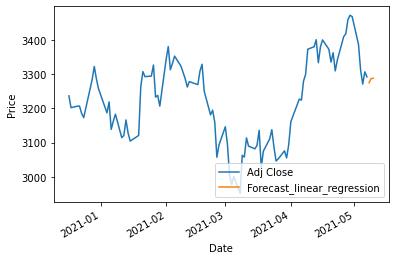

In [34]:
last_date = dfreg_lr.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set_linear_regression:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg_lr.loc[next_date] = [np.nan for _ in range(len(dfreg_lr.columns)-1)]+[i]
dfreg_lr['Adj Close'].tail(noOfDaysData).plot()
dfreg_lr['Forecast_linear_regression'].tail(noOfDaysData).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [35]:
df=FB
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-11,215.000000,210.369995,210.889999,213.179993,12911900,213.179993
2020-05-12,215.279999,210.000000,213.289993,210.100006,14704600,210.100006
2020-05-13,210.779999,202.110001,209.429993,205.100006,20684600,205.100006
2020-05-14,206.929993,200.690002,202.559998,206.809998,17178900,206.809998
2020-05-15,211.339996,204.119995,205.270004,210.880005,19383200,210.880005


In [36]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2021-05-03,322.579987,18719500,2.080102,-1.100661
2021-05-04,318.359985,24032600,2.848978,-0.518719
2021-05-05,315.019989,15577600,2.085584,-0.996264
2021-05-06,320.019989,19012200,2.177989,1.748696
2021-05-07,319.079987,15912800,1.313151,-1.023642


In [37]:
import math
from sklearn import preprocessing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]
y_lately = y[-forecast_out:]

In [38]:
X_train = X
y_train = y

# 1. Linear regression 
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [39]:
X_test = X_lately
y_test = y_lately

confidence_reg = clfreg.score(X_test, y_test)

print("confidencereg : ",confidence_reg)


confidencereg :  -1.6992379668928206


In [40]:
dfreg_lr = dfreg.copy()
dfreg_lasso = dfreg.copy()
dfreg_ridge = dfreg.copy()
dfreg_br = dfreg.copy()

noOfDaysData = 100

In [41]:
forecast_set_linear_regression = clfreg.predict(X_lately)
dfreg_lr['Forecast_linear_regression'] =  np.nan
print(forecast_set_linear_regression)

[312.41234349 314.95811475 316.69308099]


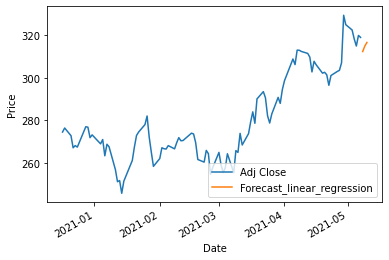

In [42]:
last_date = dfreg_lr.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set_linear_regression:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg_lr.loc[next_date] = [np.nan for _ in range(len(dfreg_lr.columns)-1)]+[i]
dfreg_lr['Adj Close'].tail(noOfDaysData).plot()
dfreg_lr['Forecast_linear_regression'].tail(noOfDaysData).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [43]:
df=GOOG
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-11,1416.530029,1377.151978,1378.280029,1403.260010,1412100,1403.260010
2020-05-12,1415.000000,1374.770020,1407.119995,1375.739990,1390600,1375.739990
2020-05-13,1385.482056,1328.400024,1377.050049,1349.329956,1812600,1349.329956
2020-05-14,1357.420044,1323.910034,1335.020020,1356.130005,1603100,1356.130005
2020-05-15,1374.479980,1339.000000,1350.000000,1373.189941,1707700,1373.189941


In [44]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2021-05-03,2395.169922,1689400,1.469622,-0.314229
2021-05-04,2354.250000,1756000,2.869706,-0.653658
2021-05-05,2356.739990,1090300,1.306467,-0.493153
2021-05-06,2381.350098,1030900,1.695344,1.306461
2021-05-07,2398.689941,1163600,1.101014,-0.054586


In [45]:
import math
from sklearn import preprocessing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]
y_lately = y[-forecast_out:]

In [46]:
X_train = X
y_train = y

# 1. Linear regression 
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [47]:
X_test = X_lately
y_test = y_lately

confidence_reg = clfreg.score(X_test, y_test)

print("confidencereg : ",confidence_reg)


confidencereg :  0.38821618539514435


In [48]:
dfreg_lr = dfreg.copy()
dfreg_lasso = dfreg.copy()
dfreg_ridge = dfreg.copy()
dfreg_br = dfreg.copy()

noOfDaysData = 100

In [49]:
forecast_set_linear_regression = clfreg.predict(X_lately)
dfreg_lr['Forecast_linear_regression'] =  np.nan
print(forecast_set_linear_regression)

[2372.61961809 2390.85262681 2412.87574175]


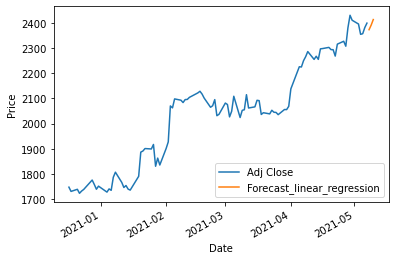

In [50]:
last_date = dfreg_lr.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set_linear_regression:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg_lr.loc[next_date] = [np.nan for _ in range(len(dfreg_lr.columns)-1)]+[i]
dfreg_lr['Adj Close'].tail(noOfDaysData).plot()
dfreg_lr['Forecast_linear_regression'].tail(noOfDaysData).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [51]:
df=NFLX
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-11,444.890015,435.559998,436.329987,440.519989,5486000,440.519989
2020-05-12,444.170013,431.359985,442.000000,431.820007,4598200,431.820007
2020-05-13,447.000000,427.269989,435.690002,438.269989,7014600,438.269989
2020-05-14,452.380005,432.820007,444.899994,441.950012,9007500,441.950012
2020-05-15,455.000000,437.510010,440.700012,454.190002,7244000,454.190002


In [52]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2021-05-03,509.109985,4091900,2.700792,-0.690537
2021-05-04,503.179993,4349500,2.949242,-1.487922
2021-05-05,496.079987,3129400,2.650781,-1.764392
2021-05-06,499.549988,3783700,1.637472,0.717756
2021-05-07,503.839996,3131100,1.474673,-0.154572


In [53]:
import math
from sklearn import preprocessing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]
y_lately = y[-forecast_out:]

In [54]:
X_train = X
y_train = y

# 1. Linear regression 
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [55]:
X_test = X_lately
y_test = y_lately

confidence_reg = clfreg.score(X_test, y_test)

print("confidencereg : ",confidence_reg)

confidencereg :  -1.0137590158874885


In [56]:
dfreg_lr = dfreg.copy()
dfreg_lasso = dfreg.copy()
dfreg_ridge = dfreg.copy()
dfreg_br = dfreg.copy()

noOfDaysData = 100

In [57]:
forecast_set_linear_regression = clfreg.predict(X_lately)
dfreg_lr['Forecast_linear_regression'] =  np.nan
print(forecast_set_linear_regression)

[502.48886991 502.18577328 507.42280928]


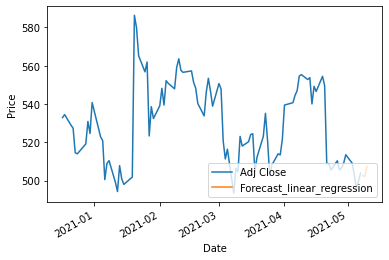

In [58]:
last_date = dfreg_lr.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set_linear_regression:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg_lr.loc[next_date] = [np.nan for _ in range(len(dfreg_lr.columns)-1)]+[i]
dfreg_lr['Adj Close'].tail(noOfDaysData).plot()
dfreg_lr['Forecast_linear_regression'].tail(noOfDaysData).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [59]:
df=TSLA
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-11,164.800003,157.000000,158.102005,162.257996,82598000.0,162.257996
2020-05-12,168.658005,161.600006,165.399994,161.882004,79534500.0,161.882004
2020-05-13,165.199997,152.660004,164.166000,158.192001,95327500.0,158.192001
2020-05-14,160.671997,152.800003,156.000000,160.666000,68411000.0,160.666000
2020-05-15,161.009995,157.309998,158.070007,159.834000,52592000.0,159.834000


In [60]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2021-05-03,684.900024,27043100.0,3.723171,-2.685417
2021-05-04,673.599976,29739300.0,3.822744,-0.786524
2021-05-05,670.940002,21901900.0,2.676836,-1.485918
2021-05-06,663.539978,27784600.0,4.674928,-2.529530
2021-05-07,672.369995,23422100.0,4.429113,0.986784


In [61]:
import math
from sklearn import preprocessing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]
y_lately = y[-forecast_out:]

In [62]:
X_train = X
y_train = y

# 1. Linear regression 
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [63]:
X_test = X_lately
y_test = y_lately

confidence_reg = clfreg.score(X_test, y_test)

print("confidencereg : ",confidence_reg)

confidencereg :  0.37186864580340695


In [64]:
dfreg_lr = dfreg.copy()
dfreg_lasso = dfreg.copy()
dfreg_ridge = dfreg.copy()
dfreg_br = dfreg.copy()

noOfDaysData = 100

In [65]:
forecast_set_linear_regression = clfreg.predict(X_lately)
dfreg_lr['Forecast_linear_regression'] =  np.nan
print(forecast_set_linear_regression)

[674.39487383 667.09414983 674.28059994]


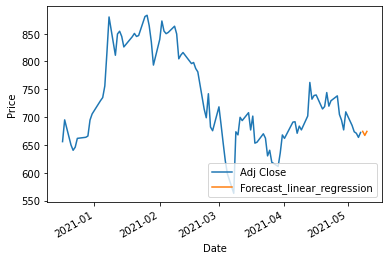

In [66]:
last_date = dfreg_lr.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set_linear_regression:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg_lr.loc[next_date] = [np.nan for _ in range(len(dfreg_lr.columns)-1)]+[i]
dfreg_lr['Adj Close'].tail(noOfDaysData).plot()
dfreg_lr['Forecast_linear_regression'].tail(noOfDaysData).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()